In [1]:
import os
import csv
import pickle

In [2]:
from scipy.fftpack import fft  
import numpy as np  

import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

In [3]:
file_path = "D:\Capstone"
dataset_path = os.path.join(file_path, "Dataset_demo")
dataset_path_lab = os.path.join(dataset_path, "in-lab")
dataset_path_wild = os.path.join(dataset_path, "in-wild")

In [4]:
def get_dataset(lab_wild, environments, train_test):
    if lab_wild == "lab":
        data = []
        labels = []
        tabel = {}


        test_folder_list = os.listdir(dataset_path_lab)

        for test_folder_name in test_folder_list:
            print(test_folder_name)
            temp_path = os.path.join(dataset_path_lab, test_folder_name)

            for env in environments:
                print(env)
                path_dir = os.path.join(temp_path, env+"_"+train_test)

                file_list = os.listdir(path_dir)
                i=0
                for file_name in file_list:
                    if i%1000 == 0:
                        print(i, "/", len(file_list))
                    csv_name = path_dir + '/' + file_name
                    f = open(csv_name, 'r', encoding='utf-8')
                    rdr = csv.reader(f)

                    temp = file_name.split("_")
                    temp_name = temp[0].split("-")
                    for line in rdr:
                        try:
                            data.append([float(l) for l in line[:-1]])
                        except:
                            print(line)
                            a=input()
                            
                        labels.append(int(temp_name[0]))
                        if not "-".join(temp_name[1:]) in tabel:
                            tabel["-".join(temp_name[1:])] = int(temp_name[0])
                    i+=1
        return data, labels, tabel

In [5]:
dataset, labels, tabel=get_dataset(lab_wild="lab", environments=['quiet'], train_test="train")


P1
quiet
0 / 2300
1000 / 2300
2000 / 2300
P10
quiet
0 / 2300
1000 / 2300
2000 / 2300
P11
quiet
0 / 2300
1000 / 2300
2000 / 2300
P12
quiet
0 / 2300
1000 / 2300
2000 / 2300
P13
quiet
0 / 2300
1000 / 2300
2000 / 2300
P14
quiet
0 / 2300
1000 / 2300
2000 / 2300
P15
quiet
0 / 2300
1000 / 2300
2000 / 2300
P16
quiet
0 / 2300
1000 / 2300
2000 / 2300
P17
quiet
0 / 2300
1000 / 2300
2000 / 2300
P18
quiet
0 / 2300
1000 / 2300
2000 / 2300
P19
quiet
0 / 2300
1000 / 2300
2000 / 2300
P2
quiet
0 / 2300
1000 / 2300
2000 / 2300
P20
quiet
0 / 2300
1000 / 2300
2000 / 2300
P3
quiet
0 / 2300
1000 / 2300
2000 / 2300
P4
quiet
0 / 2300
1000 / 2300
2000 / 2300
P5
quiet
0 / 2300
1000 / 2300
2000 / 2300
P6
quiet
0 / 2300
1000 / 2300
2000 / 2300
P7
quiet
0 / 2300
1000 / 2300
2000 / 2300
P8
quiet
0 / 2300
1000 / 2300
2000 / 2300
P9
quiet
0 / 2300
1000 / 2300
2000 / 2300


In [6]:
len(dataset)

46000

In [7]:
with open('table_.pkl','wb') as f:
    pickle.dump(tabel,f)

In [8]:

x = np.array([[4.0, 2.0, 1.0, -3.0, 1.5], [4.0, 2.0, 1.0, -3.0, 1.5]])  
y = fft(x)  
print(len(y[0]))

5


In [9]:
import sys

sys.version

'3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]'

In [10]:

test = dataset[0][:4096]
test = np.array(test)

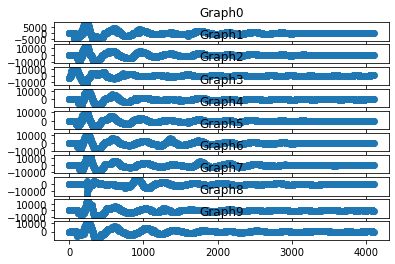

In [11]:
for i in range(10):
    plt.subplot(10, 1, i+1)                # nrows=2, ncols=1, index=1
    test = dataset[i+1][:4096]
    test = np.array(test)
    f = np.linspace(0, 4096, 4096)
    
    plt.plot(f, test, 'o-')
    plt.title('Graph'+str(i))
plt.show()


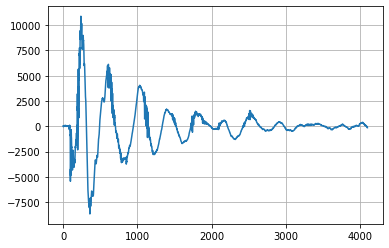

In [12]:

f = np.linspace(0, 4096, 4096)

plt.plot(f, test)

plt.grid()
 
plt.show()

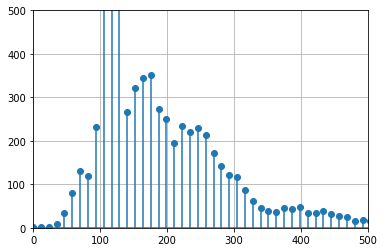

In [13]:
fs = 48000

y = fft(test)/len(test)
length = 2049
f = np.linspace(0, fs/2, length)

plt.stem(f, abs(y[:length]))

plt.xlim(0, 500)
plt.ylim(0, 500)
plt.grid()
 
plt.show()

[[-1.54694279 -1.54694279 -1.54694279 ... -0.60393555 -0.60393555
  -0.60393555]
 [-0.19121199 -0.19121199 -0.19121199 ... -0.30900204 -0.30900204
  -0.30900204]
 [ 0.05255713  0.05255713  0.05255713 ...  0.11477618  0.11477618
   0.11477618]
 ...
 [ 0.05583703  0.05583703  0.05583703 ... -0.02092392 -0.02092392
  -0.02092392]
 [-0.01508033 -0.01508033 -0.01508033 ...  0.06767169  0.06767169
   0.06767169]
 [ 0.0224003   0.0224003   0.0224003  ...  0.16592339  0.16592339
   0.16592339]]
(16, 65)


C:\Users\hyonj\anaconda3\envs\capstone\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Pass y=[  25.    0.  -25. ...  -92. -116. -131.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  This is separate from the ipykernel package so we can avoid doing imports until


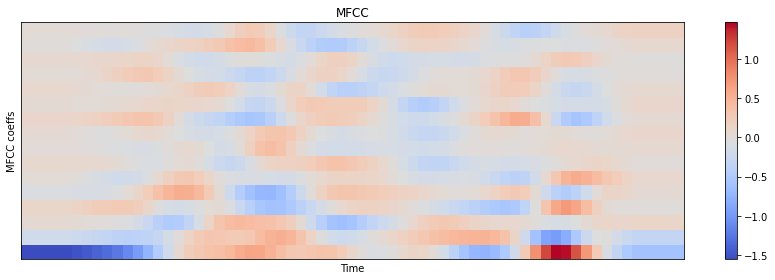

In [14]:
sample_rate=48000

S = librosa.feature.melspectrogram(test, sr=sample_rate, n_fft=2048, n_mels=128, hop_length=64, win_length=None)

log_S = librosa.power_to_db(S, ref=np.max)

mfcc = librosa.feature.mfcc(S=log_S, sr=sample_rate, n_mfcc=16, n_fft=64, hop_length=64, win_length=None)

delta2_mfcc = librosa.feature.delta(mfcc, order=2)
print(delta2_mfcc)
"""

S = librosa.feature.melspectrogram(test, sr=sample_rate, n_mels=128)
log_S = librosa.power_to_db(S, ref=np.max)
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

delta2_mfcc = librosa.feature.delta(mfcc, order=2)

"""


print(delta2_mfcc.shape)

#13*8

plt.figure(figsize=(12, 4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

In [15]:
##

In [16]:
test_dataset, test_labels, test_tabel=get_dataset(lab_wild="lab", environments=['quiet'], train_test="test")


P1
quiet
0 / 230
P10
quiet
0 / 230
P11
quiet
0 / 230
P12
quiet
0 / 230
P13
quiet
0 / 230
P14
quiet
0 / 230
P15
quiet
0 / 230
P16
quiet
0 / 230
P17
quiet
0 / 230
P18
quiet
0 / 230
P19
quiet
0 / 230
P2
quiet
0 / 230
P20
quiet
0 / 230
P3
quiet
0 / 230
P4
quiet
0 / 230
P5
quiet
0 / 230
P6
quiet
0 / 230
P7
quiet
0 / 230
P8
quiet
0 / 230
P9
quiet
0 / 230


In [17]:
len(test_dataset)

4600

In [18]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [22]:
def padding(array, xx, yy):
    """
    :param array: numpy array
    :param xx: desired height
    :param yy: desirex width
    :return: padded array
    """
    h = array.shape[0]
    w = array.shape[1]
    a = max((xx - h) // 2,0)
    aa = max(0,xx - a - h)
    b = max(0,(yy - w) // 2)
    bb = max(yy - b - w,0)
    return np.pad(array, pad_width=((a, aa), (b, bb)), mode='constant')

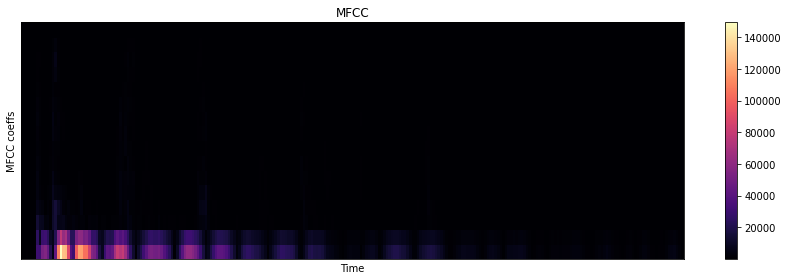

In [36]:

d = np.array(test)
y_cut = d[:4096]
max_size=256 #my max audio file feature width
sample_rate=48000

stft = np.abs(librosa.stft(y_cut, n_fft=31, hop_length= 16))

plt.figure(figsize=(12, 4))
librosa.display.specshow(stft)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

plt.tight_layout()

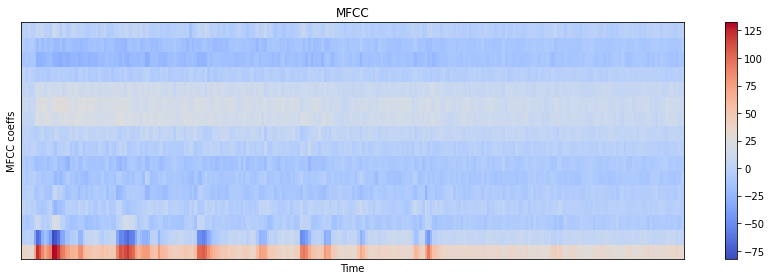

In [38]:

MFCCs = librosa.feature.mfcc(y_cut, n_fft=31, hop_length=16,n_mfcc=16)
          
plt.figure(figsize=(12, 4))
librosa.display.specshow(MFCCs)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

plt.tight_layout()

[[3562.13560849 3326.2878452  3704.64552484 3812.00368344 3920.58114453
  3589.64830369 3069.06374938 2650.79033475 2702.40718673]]


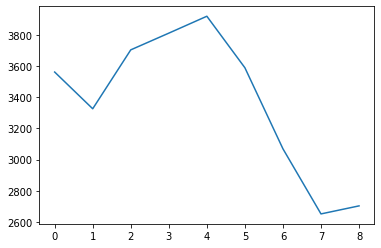

In [61]:
    
spec_centroid = librosa.feature.spectral_centroid(y=y_cut, sr=sample_rate)
print(spec_centroid)
plt.plot(spec_centroid[0])
plt.show()

[[0.97359604 0.95460922 0.78229908 0.93851496 0.76900707 0.88787851
  0.92292957 0.34035624 0.32967759]
 [1.         0.89644876 0.54906415 0.91352977 1.         1.
  0.9113437  0.31888665 0.43202563]
 [0.96432713 0.79517428 0.38659523 0.79383533 0.99294558 0.94034437
  0.84597869 0.36718106 0.52023598]
 [0.90979041 0.65592851 0.27182117 0.51543223 0.67713042 0.67024293
  0.72239364 0.59385485 0.68676868]
 [0.935318   0.59338418 0.22947847 0.29083416 0.3744029  0.45273748
  0.65550929 0.88664303 0.91160553]
 [0.87563744 0.56820781 0.26379177 0.21657775 0.2524556  0.36999592
  0.54452019 0.92889615 0.9486004 ]
 [0.86365473 0.61502567 0.34408045 0.22567255 0.21712005 0.35532697
  0.44063784 1.         0.98877808]
 [0.83455593 0.6327936  0.41680765 0.2825016  0.21203636 0.36809082
  0.42227634 0.99868233 1.        ]
 [0.83723929 0.6459026  0.5153207  0.43300082 0.25465762 0.42682936
  0.51226732 0.68803743 0.86087036]
 [0.91022715 0.78252076 0.75196167 0.70408112 0.3578964  0.56424673
  0.

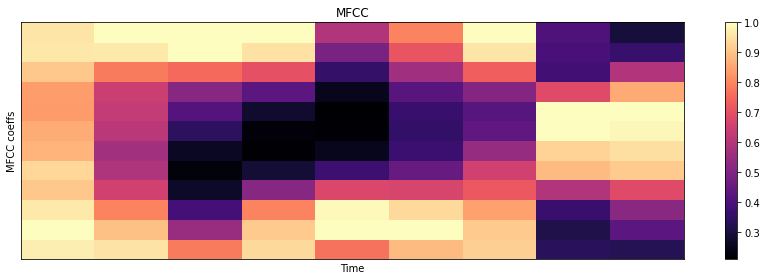

In [64]:

chroma_stft = librosa.feature.chroma_stft(y=y_cut, sr=sample_rate)
print(chroma_stft)

plt.figure(figsize=(12, 4))
librosa.display.specshow(chroma_stft)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

plt.tight_layout()

[[5397.85372579 5265.66473833 5237.69820702 5114.4765188  5309.95145446
  5086.19907305 4847.99790252 4741.1227629  4868.41452379]]


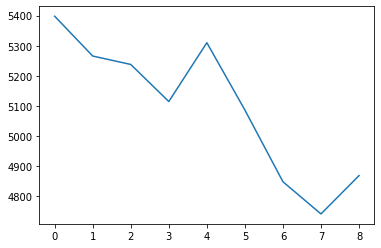

In [63]:

spec_bw = librosa.feature.spectral_bandwidth(y=y_cut, sr=sample_rate)
print(spec_bw)
plt.plot(spec_bw[0])
plt.show()


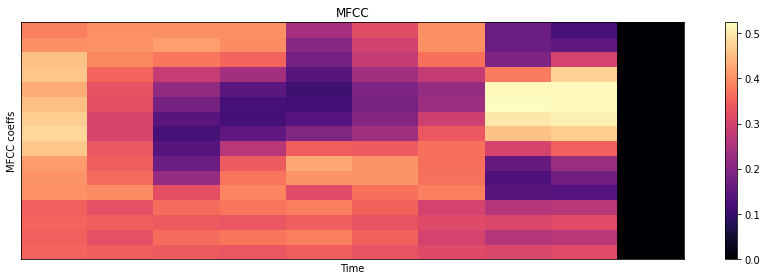

In [72]:

#Now the padding part
max_size=10 #my max audio file feature width
image = np.array([padding(normalize(spec_bw),1, max_size)]).reshape(1,max_size)
image = np.append(image,padding(normalize(spec_centroid),1, max_size), axis=0) 
#repeat the padded spec_bw,spec_centroid and chroma stft until they are stft and MFCC-sized

image = np.append(image,padding(normalize(spec_bw),1, max_size), axis=0)
image = np.append(image, padding(normalize(spec_centroid),1, max_size), axis=0)
image = np.append(image, padding(normalize(chroma_stft),12, max_size), axis=0)          
plt.figure(figsize=(12, 4))
librosa.display.specshow(image)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

plt.tight_layout()

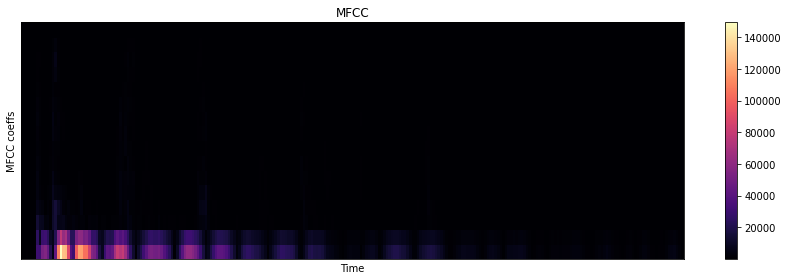

In [53]:

image=np.dstack((image,np.abs(stft)))
plt.figure(figsize=(12, 4))
librosa.display.specshow(image[:,:,1])
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()
#librosa.display.specshow(librosa.feature.mfcc(y_cut, n_fft=128, hop_length=32, win_length=32,n_mfcc=8))
#librosa.display.specshow(librosa.stft(y_cut, n_fft=128, hop_length= 32))
#plt.plot(spec_bw[0])
#plt.plot(spec_centroid[0])
#plt.plot(stft[0])

#plt.colorbar()
plt.tight_layout()
#librosa.display.specshow(librosa.stft(y_cut, n_fft=2048, hop_length= 255))

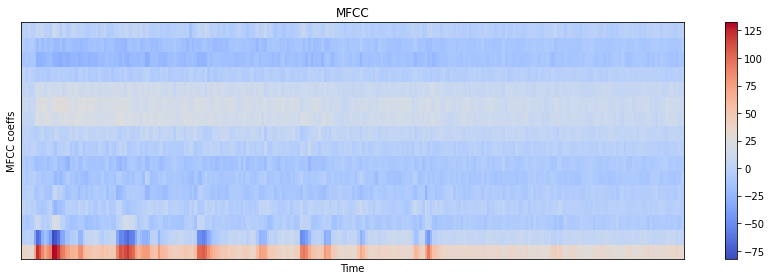

In [54]:

image=np.dstack((image,MFCCs))
plt.figure(figsize=(12, 4))
librosa.display.specshow(image[:,:,2])
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()
#librosa.display.specshow(librosa.feature.mfcc(y_cut, n_fft=128, hop_length=32, win_length=32,n_mfcc=8))
#librosa.display.specshow(librosa.stft(y_cut, n_fft=128, hop_length= 32))
#plt.plot(spec_bw[0])
#plt.plot(spec_centroid[0])
#plt.plot(stft[0])

#plt.colorbar()
plt.tight_layout()

(16, 256, 3)
(8, 256)
(8, 256)


C:\Users\hyonj\anaconda3\envs\capstone\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)


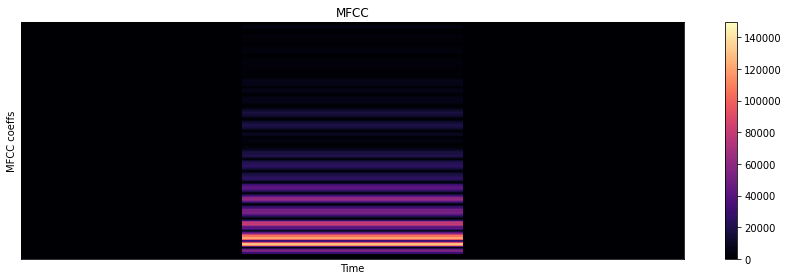

In [48]:

print(image.shape)
print(librosa.feature.mfcc(y_cut, n_fft=15, hop_length=16,n_mfcc=8).shape)
print(np.abs(librosa.stft(y_cut, n_fft=15, hop_length= 16)).shape)

plt.figure(figsize=(12, 4))
librosa.display.specshow(image[0])
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()
#librosa.display.specshow(librosa.feature.mfcc(y_cut, n_fft=128, hop_length=32, win_length=32,n_mfcc=8))
#librosa.display.specshow(librosa.stft(y_cut, n_fft=128, hop_length= 32))
#plt.plot(spec_bw[0])
#plt.plot(spec_centroid[0])
#plt.plot(stft[0])

#plt.colorbar()
plt.tight_layout()
#librosa.display.specshow(librosa.stft(y_cut, n_fft=2048, hop_length= 255))

In [60]:
def generate_features(d):
    d = np.array(d)
    y_cut = d[:4096]
    max_size=4096 #my max audio file feature width
    sample_rate=48000

    stft = padding(np.abs(librosa.stft(y_cut, n_fft=255, hop_length= 512)), 128, max_size)
    MFCCs = padding(librosa.feature.mfcc(y_cut, n_fft=255, hop_length=512,n_mfcc=128),128,max_size)
    spec_centroid = librosa.feature.spectral_centroid(y=y_cut, sr=sample_rate)
    chroma_stft = librosa.feature.chroma_stft(y=y_cut, sr=sample_rate)
    spec_bw = librosa.feature.spectral_bandwidth(y=y_cut, sr=sample_rate)
    #Now the padding part
    image = np.array([padding(normalize(spec_bw),1, max_size)]).reshape(1,max_size)
    image = np.append(image,padding(normalize(spec_centroid),1, max_size), axis=0) 
    #repeat the padded spec_bw,spec_centroid and chroma stft until they are stft and MFCC-sized
    for i in range(0,9):
        image = np.append(image,padding(normalize(spec_bw),1, max_size), axis=0)
        image = np.append(image, padding(normalize(spec_centroid),1, max_size), axis=0)
        image = np.append(image, padding(normalize(chroma_stft),12, max_size), axis=0)
    image=np.dstack((image,np.abs(stft)))
    image=np.dstack((image,MFCCs))
    return image

def get_mfccs(data):
    sample_rate=48000

    S = librosa.feature.melspectrogram(data, sr=sample_rate, n_fft=2048, n_mels=128, hop_length=64, win_length=None)

    log_S = librosa.power_to_db(S, ref=np.max)

    mfcc = librosa.feature.mfcc(S=log_S, sr=sample_rate, n_mfcc=16, n_fft=64, hop_length=64, win_length=None)

    delta2_mfcc = librosa.feature.delta(mfcc, order=2)
    
    return delta2_mfcc

def get_features(d):
    d = np.array(d)
    dataset_sound = d[:4096]
    dataset_acc_x = d[4096:4127]
    dataset_acc_y = d[4128:4159]
    dataset_acc_z = d[4160:4191]
    dataset_gyr_x = d[4192:4223]
    dataset_gyr_y = d[4224:4255]
    dataset_gyr_z = d[4256:4287]
    
    dataset_sound_mag = fft(dataset_sound)
    dataset_sound_mag = abs(dataset_sound_mag[:2049])
    if 0 in dataset_sound_mag:
        dataset_sound_mag = np.where(dataset_sound_mag==0, 0.0000001, dataset_sound_mag)
    dataset_sound_mag_log = np.log(dataset_sound_mag)
    
    dataset_mfccs = get_mfccs(dataset_sound).flatten()
    
    dataset_acc_x = np.pad(dataset_acc_x, ((0, 224)), 'constant')
    dataset_acc_x_mag = abs(fft(dataset_acc_x))
    
    dataset_gyr_z = np.pad(dataset_gyr_z, ((0, 224)), 'constant')
    dataset_gyr_z_mag = abs(fft(dataset_gyr_z))
    """
    print(dataset_sound_mag)
    print(dataset_sound_mag_log.dtype)
    print(dataset_mfccs.dtype)
    print(dataset_acc_x_mag.dtype)
    print(dataset_gyr_z_mag.dtype)
    """
    return np.concatenate ((dataset_sound_mag, dataset_sound_mag_log, dataset_mfccs, dataset_acc_x_mag, dataset_gyr_z_mag))

(16, 256, 3)
(8, 256)
(8, 256)


C:\Users\hyonj\AppData\Local\Temp\ipykernel_23196\1624825135.py:7: FutureWarning: Pass y=[-88. -88. -88. ... 236. 250. 272.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(y_cut, n_fft=31, hop_length=16,n_mfcc=16)
C:\Users\hyonj\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
C:\Users\hyonj\AppData\Local\Temp\ipykernel_23196\1624825135.py:23: FutureWarning: Pass y=[-88. -88. -88. ... 236. 250. 272.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  print(librosa.feature.mfcc(y_cut, n_fft=15, hop_length=16,n_mfcc=8).shape)
C:\Users\hyonj\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. 

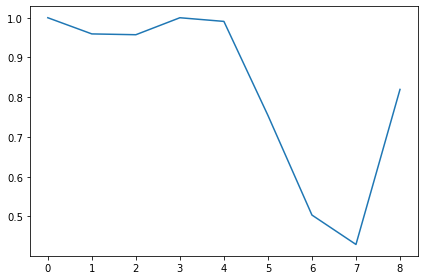

In [185]:
def generate_custom_features(y_cut):

    d = np.array(y_cut)
    y_cut = d[:4096]
    max_size=256 #my max audio file feature width
    sample_rate=48000

    stft = np.abs(librosa.stft(y_cut, n_fft=31, hop_length= 16))
    MFCCs = librosa.feature.mfcc(y_cut, n_fft=31, hop_length=16,n_mfcc=16)

    spec_centroid = librosa.feature.spectral_centroid(y=y_cut, sr=sample_rate)
    chroma_stft = librosa.feature.chroma_stft(y=y_cut, sr=sample_rate)
    spec_bw = librosa.feature.spectral_bandwidth(y=y_cut, sr=sample_rate)
    #Now the padding part
    image = np.array([padding(normalize(spec_bw),1, max_size)]).reshape(1,max_size)
    image = np.append(image,padding(normalize(spec_centroid),1, max_size), axis=0) 
    #repeat the padded spec_bw,spec_centroid and chroma stft until they are stft and MFCC-sized

    image = np.append(image,padding(normalize(spec_bw),1, max_size), axis=0)
    image = np.append(image, padding(normalize(spec_centroid),1, max_size), axis=0)
    image = np.append(image, padding(normalize(chroma_stft),12, max_size), axis=0)
    
    image=np.dstack((image,np.abs(stft)))
    image=np.dstack((image,MFCCs))
    return image

In [188]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

In [190]:
dataset_pre = np.zeros((46000, 16, 256, 3))
dataset_test_pre = np.zeros((4600, 16, 256, 3))
for i, d in enumerate(dataset):
    
    if i%1000 == 0:
        print(i, '/', len(dataset))
    dataset_pre[i] = generate_custom_features(d)
    
for i, d in enumerate(test_dataset):
    if i%1000 == 0:
        print(i, '/', len(test_dataset))
    dataset_test_pre[i] = generate_custom_features(d)

0 / 46000
1000 / 46000
2000 / 46000
3000 / 46000
4000 / 46000
5000 / 46000
6000 / 46000
7000 / 46000
8000 / 46000
9000 / 46000
10000 / 46000
11000 / 46000
12000 / 46000
13000 / 46000
14000 / 46000
15000 / 46000
16000 / 46000
17000 / 46000
18000 / 46000
19000 / 46000
20000 / 46000
21000 / 46000
22000 / 46000
23000 / 46000
24000 / 46000
25000 / 46000
26000 / 46000
27000 / 46000
28000 / 46000
29000 / 46000
30000 / 46000
31000 / 46000
32000 / 46000
33000 / 46000
34000 / 46000
35000 / 46000
36000 / 46000
37000 / 46000
38000 / 46000
39000 / 46000
40000 / 46000
41000 / 46000
42000 / 46000
43000 / 46000
44000 / 46000
45000 / 46000
0 / 4600
1000 / 4600
2000 / 4600
3000 / 4600
4000 / 4600


In [191]:
np.NaN in dataset_pre

False

In [199]:
np.save("dataset_pre.npy", dataset_pre)
np.save("dataset_test_pre.npy", dataset_test_pre)
np.save("dataset_pre_labels.npy", labels)
np.save("dataset_test_pre_labels.npy", test_labels)

In [197]:
n_labels = len(np.unique(labels))
n_labels

23

In [198]:

from tensorflow.keras import models, layers
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [63]:
input_shape=(16,256,3)
CNNmodel = models.Sequential()
CNNmodel.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
CNNmodel.add(layers.MaxPooling2D((2, 2)))
CNNmodel.add(layers.Dropout(0.2))
CNNmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNNmodel.add(layers.MaxPooling2D((2, 2)))
CNNmodel.add(layers.Dropout(0.2))
CNNmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNNmodel.add(layers.Flatten())
CNNmodel.add(layers.Dense(64, activation='relu'))
CNNmodel.add(layers.Dropout(0.2))
CNNmodel.add(layers.Dense(32, activation='relu'))
CNNmodel.add(layers.Dense(n_labels, activation='softmax'))

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [ ]:
history = CNNmodel.fit(X_train, y_train, epochs=20, validation_data= (X_val, y_val))

In [97]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(dataset_test_pre)

accuracy_score(test_labels, y_pred)

0.9360869565217391